<a href="https://colab.research.google.com/github/krrissh77/myself/blob/main/DGA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df=pd.read_csv("/content/dga_data.csv")
df.head()



,isDGA,domain,host,subclass
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,dga,jpqftymiuver,jpqftymiuver.ru,cryptolocker


In [ ]:
input=df.drop(["host","subclass",], axis="columns")


In [ ]:

from sklearn.preprocessing import LabelEncoder

le_dga=LabelEncoder()

input["DGA ?"]=le_dga.fit_transform(input["isDGA"])

input.head()

,isDGA,domain,DGA ?
0,dga,6xzxsw3sokvg1tc752y1a6p0af,0
1,dga,glbtlxwwhbnpxs,0
2,dga,xxmamopyipbfpk,0
3,dga,zfd5szpi18i85wj9uy13l69rg,0
4,dga,jpqftymiuver,0


In [ ]:
# prompt: remove redunanct string in domain


input["rem_redun"] = input["domain"].astype(str).apply(lambda x: x.split(".")[0])
input["length"]=input["domain"].str.len()



# Apply label encoding to the 'TLD' column
label_encoder = LabelEncoder()
input["rem_redun_encoded"] = label_encoder.fit_transform(input["rem_redun"])




input.head()

,isDGA,domain,DGA ?,rem_redun,length,rem_redun_encoded
0,dga,6xzxsw3sokvg1tc752y1a6p0af,0,6xzxsw3sokvg1tc752y1a6p0af,26.0,12890
1,dga,glbtlxwwhbnpxs,0,glbtlxwwhbnpxs,14.0,59056
2,dga,xxmamopyipbfpk,0,xxmamopyipbfpk,14.0,155193
3,dga,zfd5szpi18i85wj9uy13l69rg,0,zfd5szpi18i85wj9uy13l69rg,25.0,159175
4,dga,jpqftymiuver,0,jpqftymiuver,12.0,75647


In [ ]:

input["vowel_consonant_ratio"] = input["domain"].apply(lambda x: len([c for c in str(x).lower() if c in 'aeiou']) / max(1, len([c for c in str(x).lower() if c.isalpha()]) - len([c for c in str(x).lower() if c in 'aeiou'])))

input.head()




,isDGA,domain,DGA ?,rem_redun,length,rem_redun_encoded,vowel_consonant_ratio
0,dga,6xzxsw3sokvg1tc752y1a6p0af,0,6xzxsw3sokvg1tc752y1a6p0af,26.0,12890,0.214286
1,dga,glbtlxwwhbnpxs,0,glbtlxwwhbnpxs,14.0,59056,0.000000
2,dga,xxmamopyipbfpk,0,xxmamopyipbfpk,14.0,155193,0.272727
3,dga,zfd5szpi18i85wj9uy13l69rg,0,zfd5szpi18i85wj9uy13l69rg,25.0,159175,0.250000
4,dga,jpqftymiuver,0,jpqftymiuver,12.0,75647,0.333333


In [ ]:

import math

# Assuming your DataFrame is named 'df' and the 'domain' column is already present
input["entropy"] = input["domain"].astype(str).apply(lambda x: -sum((x.count(c) / len(x)) * math.log2(x.count(c) / len(x)) for c in set(x)))

input.head()



,isDGA,domain,DGA ?,rem_redun,length,rem_redun_encoded,vowel_consonant_ratio,entropy
0,dga,6xzxsw3sokvg1tc752y1a6p0af,0,6xzxsw3sokvg1tc752y1a6p0af,26.0,12890,0.214286,4.315824
1,dga,glbtlxwwhbnpxs,0,glbtlxwwhbnpxs,14.0,59056,0.000000,3.235926
2,dga,xxmamopyipbfpk,0,xxmamopyipbfpk,14.0,155193,0.272727,3.182006
3,dga,zfd5szpi18i85wj9uy13l69rg,0,zfd5szpi18i85wj9uy13l69rg,25.0,159175,0.250000,4.163856
4,dga,jpqftymiuver,0,jpqftymiuver,12.0,75647,0.333333,3.584963


In [ ]:
# Assuming df is your DataFrame and 'domain' is the column containing domain names
input["vowel_ratio"] = input["domain"].apply(lambda x: sum(c.lower() in 'aeiou' for c in str(x)) / max(1, len(str(x))))


# Assuming df is your DataFrame and 'domain' is the column containing domain names
input["consonant_ratio"] = input["domain"].apply(lambda x: sum(c.lower() in 'bcdfghjklmnpqrstvwxyz' for c in str(x)) / max(1, len([c for c in str(x) if c.isalpha()]) - sum(c.lower() in 'aeiou' for c in str(x))))



input.head()

,isDGA,domain,DGA ?,rem_redun,length,rem_redun_encoded,vowel_consonant_ratio,entropy,vowel_ratio,consonant_ratio
0,dga,6xzxsw3sokvg1tc752y1a6p0af,0,6xzxsw3sokvg1tc752y1a6p0af,26.0,12890,0.214286,4.315824,0.115385,1.0
1,dga,glbtlxwwhbnpxs,0,glbtlxwwhbnpxs,14.0,59056,0.000000,3.235926,0.000000,1.0
2,dga,xxmamopyipbfpk,0,xxmamopyipbfpk,14.0,155193,0.272727,3.182006,0.214286,1.0
3,dga,zfd5szpi18i85wj9uy13l69rg,0,zfd5szpi18i85wj9uy13l69rg,25.0,159175,0.250000,4.163856,0.120000,1.0
4,dga,jpqftymiuver,0,jpqftymiuver,12.0,75647,0.333333,3.584963,0.250000,1.0


In [ ]:
# Assuming df is your DataFrame and 'domain' is the column containing domain names
input["TLD"] = input["domain"].apply(lambda x: x.split(".")[-1] if isinstance(x, str) else None)



input.head()

,isDGA,domain,DGA ?,rem_redun,length,rem_redun_encoded,vowel_consonant_ratio,entropy,vowel_ratio,consonant_ratio,TLD
0,dga,6xzxsw3sokvg1tc752y1a6p0af,0,6xzxsw3sokvg1tc752y1a6p0af,26.0,12890,0.214286,4.315824,0.115385,1.0,6xzxsw3sokvg1tc752y1a6p0af
1,dga,glbtlxwwhbnpxs,0,glbtlxwwhbnpxs,14.0,59056,0.000000,3.235926,0.000000,1.0,glbtlxwwhbnpxs
2,dga,xxmamopyipbfpk,0,xxmamopyipbfpk,14.0,155193,0.272727,3.182006,0.214286,1.0,xxmamopyipbfpk
3,dga,zfd5szpi18i85wj9uy13l69rg,0,zfd5szpi18i85wj9uy13l69rg,25.0,159175,0.250000,4.163856,0.120000,1.0,zfd5szpi18i85wj9uy13l69rg
4,dga,jpqftymiuver,0,jpqftymiuver,12.0,75647,0.333333,3.584963,0.250000,1.0,jpqftymiuver


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'domain' is the column containing domain names
input["TLD"] = input["domain"].apply(lambda x: x.split(".")[-1] if isinstance(x, str) else None)

# Apply label encoding to the 'TLD' column
label_encoder = LabelEncoder()
input["TLD_encoded"] = label_encoder.fit_transform(input["TLD"])

# Example: Print the first few rows of the DataFrame
input.head()

,isDGA,domain,DGA ?,rem_redun,length,rem_redun_encoded,vowel_consonant_ratio,entropy,vowel_ratio,consonant_ratio,TLD,TLD_encoded
0,dga,6xzxsw3sokvg1tc752y1a6p0af,0,6xzxsw3sokvg1tc752y1a6p0af,26.0,12890,0.214286,4.315824,0.115385,1.0,6xzxsw3sokvg1tc752y1a6p0af,12890
1,dga,glbtlxwwhbnpxs,0,glbtlxwwhbnpxs,14.0,59056,0.000000,3.235926,0.000000,1.0,glbtlxwwhbnpxs,59056
2,dga,xxmamopyipbfpk,0,xxmamopyipbfpk,14.0,155193,0.272727,3.182006,0.214286,1.0,xxmamopyipbfpk,155192
3,dga,zfd5szpi18i85wj9uy13l69rg,0,zfd5szpi18i85wj9uy13l69rg,25.0,159175,0.250000,4.163856,0.120000,1.0,zfd5szpi18i85wj9uy13l69rg,159174
4,dga,jpqftymiuver,0,jpqftymiuver,12.0,75647,0.333333,3.584963,0.250000,1.0,jpqftymiuver,75647


In [ ]:
# Assuming df is your DataFrame and 'domain' is the column containing domain names
input["special_character"] = input["domain"].apply(lambda x: sum(c.isalnum() == False for c in str(x)) if isinstance(x, str) else 0)

# Display the DataFrame with the new column
input.head()


,isDGA,domain,DGA ?,rem_redun,length,rem_redun_encoded,vowel_consonant_ratio,entropy,vowel_ratio,consonant_ratio,TLD,TLD_encoded,special_character
0,dga,6xzxsw3sokvg1tc752y1a6p0af,0,6xzxsw3sokvg1tc752y1a6p0af,26.0,12890,0.214286,4.315824,0.115385,1.0,6xzxsw3sokvg1tc752y1a6p0af,12890,0
1,dga,glbtlxwwhbnpxs,0,glbtlxwwhbnpxs,14.0,59056,0.000000,3.235926,0.000000,1.0,glbtlxwwhbnpxs,59056,0
2,dga,xxmamopyipbfpk,0,xxmamopyipbfpk,14.0,155193,0.272727,3.182006,0.214286,1.0,xxmamopyipbfpk,155192,0
3,dga,zfd5szpi18i85wj9uy13l69rg,0,zfd5szpi18i85wj9uy13l69rg,25.0,159175,0.250000,4.163856,0.120000,1.0,zfd5szpi18i85wj9uy13l69rg,159174,0
4,dga,jpqftymiuver,0,jpqftymiuver,12.0,75647,0.333333,3.584963,0.250000,1.0,jpqftymiuver,75647,0


In [ ]:
input.head()
input.drop(["isDGA"], axis="columns")

final_input=input.drop(["DGA ?","isDGA","domain","rem_redun","TLD"], axis="columns")

target=input.drop(["domain","rem_redun","length","entropy","vowel_consonant_ratio","isDGA","vowel_ratio","consonant_ratio","TLD","TLD_encoded","rem_redun_encoded","special_character"],axis="columns")

final_input.head()

target.head()

,DGA ?
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train ,y_test= train_test_split(final_input,target,test_size=0.2)

x_train.head()
y_train.head()


,DGA ?
121675,1
138659,1
7158,0
4221,0
20893,0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import sklearn.pipeline

# Create an imputer transformer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

# Create a pipeline
pipeline = sklearn.pipeline.Pipeline([
    ("imputer", imputer),
    ("classifier", DecisionTreeClassifier())
])

# Fit the pipeline to the data
pipeline.fit(x_train, y_train)

# Make predictions
predictions = pipeline.predict(x_test)

In [ ]:
pipeline.score(x_test,y_test)

0.92953125

In [ ]:
y_predicted=pipeline.predict(x_test)
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_predicted)
cm




array([[14774,  1141],
       [ 1099, 14986]])

<Axes: >

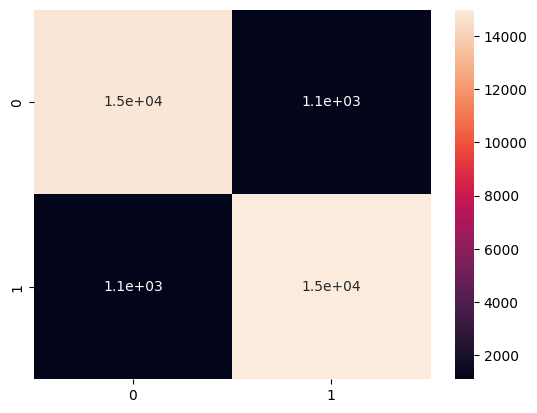

In [ ]:
import seaborn as sn
plt.x_label=("predicted")
plt.y_label=("truth")
sn.heatmap(cm,annot=True)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")


# Create the pipeline.
model_rfc = Pipeline([
    ("imputer", imputer),
    ("classifier", RandomForestClassifier())
])

# Fit the pipeline to the data.
model_rfc.fit(x_train, y_train)

# Predict the labels for the test data.
y_pred = model_rfc.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [ ]:
model_rfc.score(x_test,y_test)

0.9294375

<Axes: >

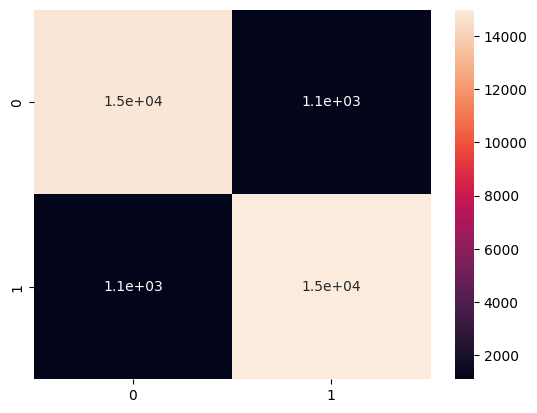

In [ ]:
y_predicted1=pipeline.predict(x_test)
from sklearn.metrics import confusion_matrix

cm1=confusion_matrix(y_test,y_predicted)
cm1

import seaborn as sn
plt.x_label=("predicted")
plt.y_label=("truth")
sn.heatmap(cm1,annot=True)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(DecisionTreeClassifier(),x_train,y_train)



ValueError: ignored

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

# Create the Imputer transformer.
imputer = SimpleImputer(strategy="mean")

# Create the HistGradientBoostingClassifier.
classifier = HistGradientBoostingClassifier()

# Create the pipeline.
pipeline = Pipeline([("imputer", imputer), ("classifier", classifier)])

# Fit the pipeline to the data.
pipeline.fit(x_train, y_train)

# Make predictions on the test data.
predictions = pipeline.predict(x_test)

# Evaluate the predictions.
score = cross_val_score(pipeline, x_train, y_train)

print(score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[0.91195313 0.90851563 0.90710937 0.91003906 0.90953125]
